In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
def one_hot_encode(seq):
    # Getting sequences
    matrix = np.zeros((len(seq),20))

    # Iterate over the amino acid sequence and set matrix entries to 1
    for position, amino_acid in enumerate(seq):
        # row_index = "ARNDCEQGHILKMFPSTWYV".index(amino_acid)
        row_index = "RHKDESTNQCGPAVILMFYW".index(amino_acid)
        matrix[position][row_index] = 1
    return matrix

# Training data

In [3]:
import os
os.getcwd()

'/Users/claireleblanc/Documents/grad_school/staller_lab/NN_interpretability_for_AD_prediction/scripts/analysis_scripts'

In [4]:
train_data_df = pd.read_csv("../../Data/pm_gcn4_sort2_pools_allchannels_wrangled_w_ratio_training_heirarchical_v2.csv")
train_data_df["X"] = [one_hot_encode(s) for s in train_data_df["aa_seq"]]
train_data_df

,aa_seq,activity,abundance,ratio,X
0,LQDFVLFDQPIRPHRQHNRNALQPPTRGINLNQQHRSQHL,270.500000,2275.157246,23705.971880,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,VEHSPAEKSDDLEVVEPTSGHQRRKSGTSPPSGRHSSVSG,1081.420642,3180.013344,18161.451312,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,NAGTASRFLTTVVALCSPSDVSSTVLTGNARMQVRPIGPL,603.933187,1160.105019,52119.378755,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
3,SSTTALQQQHRQTRPQVPLFSQSTGSIPKTPNMVMQGTYI,706.024331,1005.046690,55857.888067,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
4,KGGKLQASKEALYLGNAGTASRFLTTVVALCSPSDVSSTV,474.552224,1537.143665,32333.990842,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
14575,PTPTFSSPYLFDSPSEGYETSPLFGAEDTNGDNWYSLFPE,8343.122503,1971.676200,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14576,DAWFSLFPSISGGENDESPLSAAEDVMVADPFNISAQVVL,4633.269589,280.000000,262143.000000,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14577,LYDESPDFGSGFDVSPNFAGSDFDAGGNDVWFPLFPQSNT,8178.009196,3209.784417,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14578,LYESPDFGYDVSPGFGSNDFDTGSNQWFSLFPDQSTTPDA,9064.000000,4649.000000,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
X_train = train_data_df["X"]
X_train = np.stack(X_train)

In [7]:
X_train = X_train.reshape(14580, 800)
# X = X.reshape(45503, 800)

In [8]:
y_abund_train = train_data_df["abundance"].values
y_act_train = train_data_df["activity"].values

In [9]:
reg_abund = LinearRegression().fit(X_train, y_abund_train)
reg_act = LinearRegression().fit(X_train, y_act_train)

# Testing using validation data

In [10]:
test_data_df = pd.read_csv("../../Data/pm_gcn4_sort2_pools_allchannels_wrangled_w_ratio_test_heirarchical_v2.csv")
# data_df = pd.read_csv('../../Data/PADI_ADScore_data_wrangled_validation.csv')
test_data_df["X"] = [one_hot_encode(s) for s in test_data_df["aa_seq"]]
test_data_df

,aa_seq,activity,abundance,ratio,X
0,GPLFPAQDDFSTAFDSAALDAAIALSQPETIPAKEISVPP,3112.003616,1714.880232,120898.952542,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,TNVIAQAQGYRPSSHRLSLPGPARLSQRQHIYAASDPSNS,437.436271,2155.484437,35747.526907,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."
2,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,579.237129,3566.691915,17543.166342,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,SAFDSAALDVALALSQPETKPAKEVSVPPSPAIRNSASPA,408.878538,3013.348811,30430.118200,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
4,SSTNLDDLSAAVSAPPKTVPPPPSPMVRAASSPGQSTGTS,605.266583,3117.194936,23469.400978,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
2518,PGYFSQDTSPMFATDMELGPGVEEWGSLFPSQDDFSLGLD,8812.183991,2964.401324,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2519,YFSQDTSPMFPTDLELNPGHEEWDSLFPPQDGFPVAFDSA,8709.017129,111.000000,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2520,PDTLRLDLRTNFDDPEFFDFTEGFGEEFTDSTMLSPHLVP,9064.000000,1535.915898,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2521,HANRGPDFDALFDLTANSFVDGLDAASLAMFDTQQLDKVQ,9064.000000,4649.000000,262143.000000,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [12]:
X_test = test_data_df["X"]
X_test = np.stack(X_test)

X_test = X_test.reshape(2523, 800)
# X = X.reshape(11375, 800)

In [14]:
preds_act_test = reg_act.predict(X_test)
preds_abund_test = reg_abund.predict(X_test)

preds_act_train = reg_act.predict(X_train)
preds_abund_train = reg_abund.predict(X_train)

In [16]:
test_data_df["pred_activity"] = preds_act_test
test_data_df["pred_abund"] = preds_abund_test

train_data_df["pred_activity"] = preds_act_train
train_data_df["pred_abund"] = preds_abund_train

Text(0.5, 1.0, 'Pears')

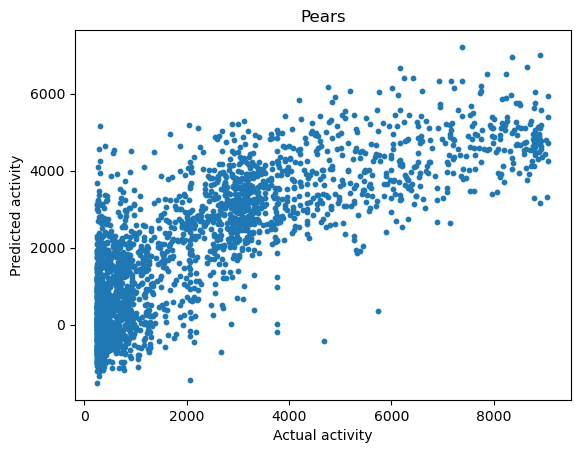

In [18]:
plt.scatter(test_data_df["activity"], test_data_df["pred_activity"], s=10)
plt.xlabel("Actual activity")
plt.ylabel("Predicted activity")

plt.title("Pears")

In [19]:
pearsonr(test_data_df["activity"], test_data_df["pred_activity"]).correlation

0.8015943703038939

In [20]:
spearmanr(test_data_df["activity"], test_data_df["pred_activity"]).correlation

0.7794972045377301

In [21]:
pearsonr(test_data_df["abundance"], test_data_df["pred_abund"]).correlation

0.55328855558113

In [22]:
spearmanr(test_data_df["abundance"], test_data_df["pred_abund"]).correlation

0.5643859404794785

# Using all data to do regression

In [65]:
data_df = pd.read_csv("/Users/claireleblanc/Documents/grad_school/staller_lab/Data/pm_gcn4_sort2_pools_allchannels_wrangled.csv")
data_df["X"] = [one_hot_encode(s) for s in data_df["aa_seq"]]
data_df

,aa_seq,activity,abundance,ratio,X
0,LQDFVLFDQPIRPHRQHNRNALQPPTRGINLNQQHRSQHL,270.500000,2275.157246,23705.971880,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,DLFGGLESSTPWIREQERIHLQYVEGLRWVTWGQMGHVEL,478.640464,4281.992228,7965.856073,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,VEHSPAEKSDDLEVVEPTSGHQRRKSGTSPPSGRHSSVSG,1081.420642,3180.013344,18161.451312,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,NAGTASRFLTTVVALCSPSDVSSTVLTGNARMQVRPIGPL,603.933187,1160.105019,52119.378755,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
4,QQQHRPHSTLQASSASPIQNPRVSDLSQDTGSIASSTSPQ,425.945104,3136.116978,19044.671497,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
...,...,...,...,...,...
17727,LYDESPDFGSGFDVSPNFAGSDFDAGGNDVWFPLFPQSNT,8178.009196,3209.784417,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17728,HANRGPDFDALFDLTANSFVDGLDAASLAMFDTQQLDKVQ,9064.000000,4649.000000,262143.000000,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17729,LYESPDFGYDVSPGFGSNDFDTGSNQWFSLFPDQSTTPDA,9064.000000,4649.000000,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17730,TPNIPQEFFDFTEGFGEEFTDSTMLSPHLVPTGIMASKDS,4862.343223,111.000000,262143.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."


In [74]:
X = data_df["X"]
X = np.stack(X)

X = X.reshape(17732, 800)

y_act = data_df["activity"].values
y_abund = data_df["abundance"].values

reg_act = LinearRegression().fit(X, y_act)
reg_abund = LinearRegression().fit(X, y_abund)

In [69]:
reg_act.score(X, y_act)

0.6412171568863205

In [75]:
reg_abund.score(X, y_abund)

0.4199682960128167

In [80]:
preds_act = reg_act.predict(X)
data_df["pred_activity"] = preds_act

preds_abund = reg_abund.predict(X)
data_df["pred_abund"] = preds_abund

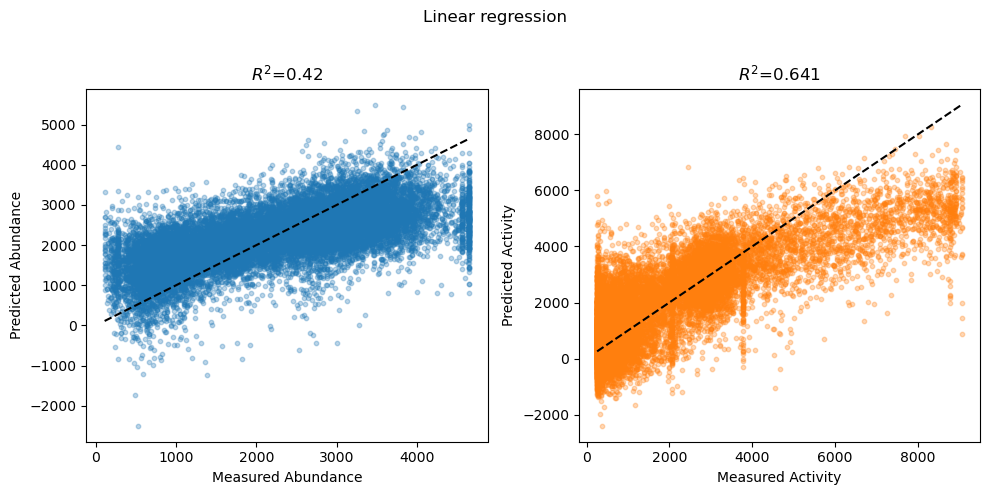

In [83]:
fig, ax = plt.subplots(1,2,figsize=[10,5])
ax[0].scatter(data_df["abundance"],data_df["pred_abund"],color='C0', s=10, alpha=.3)
Rsq = np.corrcoef(data_df["abundance"],data_df["pred_abund"])[0, 1]**2
ax[0].set_xlabel('Measured Abundance')
ax[0].set_ylabel('Predicted Abundance')
ax[0].set_title(f'\n$R^2$={Rsq:.3}')
xlim = [min(data_df["abundance"]), max(data_df["abundance"])]
ax[0].plot(xlim, xlim, '--', color='k', label='diagonal', zorder=100)

ax[1].scatter(data_df["activity"],data_df["pred_activity"],color='C1', s=10, alpha=.3)
Rsq = np.corrcoef(data_df["activity"],data_df["pred_activity"])[0, 1]**2
ax[1].set_xlabel('Measured Activity')
ax[1].set_ylabel('Predicted Activity')
ax[1].set_title(f'\n$R^2$={Rsq:.3}')
xlim = [min(data_df["activity"]), max(data_df["activity"])]
ax[1].plot(xlim, xlim, '--', color='k', label='diagonal', zorder=100)

fig.suptitle("Linear regression")
fig.tight_layout()

In [78]:
Rsq = np.corrcoef(data_df["activity"], data_df["pred_activity"])[0, 1]**2
Rsq

0.641217361156437